# 이산확률변수
 
 - 베르누이 분포
 - 이항 분포 X ~ B(n, p)
 - 기하 분포
 - 포아송 분포
 - 카테고리 분포
 - 다항 분포

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

In [3]:
# 기댓값
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

# 분산
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

#확률분포 그래프
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')  #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()
    for x, y in zip(x_set, prob):
        ax.text(x, y, round(y,4))
    
    plt.show()    

    def plot_bernoulli(mu, M):    
        rv = sp.stats.bernoulli(mu)
        x = rv.rvs(size=M, random_state=0)
    
    # 베르누이확률변수의 표본값을 무작위로 생성
    mu = 1/3
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(100, random_state=0)
    print(x)

    sns.countplot(x)
    plt.xlabel('표본값')
    plt.show()

    # 확률질량함수 pmf() 메서드 사용해서 그래프 그리기
    plt.bar(x, rv.pmf(x))
    plt.xlim(-1, 2)
    plt.ylim(0, 1)
    plt.xticks([0,1], ['x=0','x=1'])
    plt.xlabel('표본값')
    plt.ylabel('P(x)')
    plt.title(f'베르누이확률변수의 확률질량함수(표본개수={M})')
    plt.grid()
    plt.show()

    mu = 0.5    
    print(f'기대값: {mu}, 분산: {mu*(1-mu)}')
    plot_bernoulli(0.5, 10)
    plot_bernoulli(0.5, 100)

In [ ]:
#이항분포
#scipy패키지의 special모듈에 있는 comb함수 사용
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

n, p = 10, 0.3
X = Bin(n, p)

# 기대값과 분산
check_prob(X)

# 그래프
plot_prob(X)

# scipy 라이브러리 사용
n = 5
mu = 0.25
rv = sp.stats.binom(n, mu)

xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.grid()
plt.show()

from scipy.special import comb

def prob(n, p, x):    
    return comb(n,x) * p**x * (1-p)**(n-x)
    
n = 6
p = 0.4
x = 3
print(f'확률: {prob(n, p, x)}')
X = Bin(n,p)
X 

# 기대값과 분산
check_prob(X)

# 그래프
plot_prob(X)

# 이항분포 기대값과 분산
def E_binom(n, p):
    return n*p

def V_binom(n, p):
    return n*p*(1-p)
    
    
print(f'기대값 E(X): {E_binom(n, p):.4}')
print(f'분산   V(X): {V_binom(n, p):.4}')



# 연속확률분포

- 정규분포 X ~ N(mu, std)
- 표준정규분포 X ~ N(0, 1)

#### scipy 확률분포 클래스
- 이산 : bernoulli (베르누이분포)- 이진분류
- 이산 : binom (이항분포) - 이진분류
- 이산 : multinomial (다항분포) - 다중분류
- 이산 : geometric(기하분포)
- 이산 : poisson (포아송분포)

- 연속 : uniform (균일분포)
- 연속 : norm (정규분포)
- 연속 : beta (베타분포)
- 연속 : gamma (감마분포)
- 연속 : t (스튜던트 t분포)
- 연속 : f (F분포)
- 연속 : chi2 (카이제곱분포)
- 연속 : dirichlet (디리클리분포)    
- 연속 : multivariate_normal (다변수 정규분포)

#### Scipy 확률분포 메서드
- pmf : 확률질량함수(probability mass function) 
- pdf : 확률밀도함수(probability density function)
- cdf : 누적분포함수(cumulative distibution function)
- ppf : 누적분포함수의 역함수(inverse cumulative distibution function)
- sf  : 생존함수(survival function) = 1 - 누적분포함수
- isf : 생존함수의 역함수(inverse survival function)
- rvs : 랜덤 표본 생성(random variable sampling)

확률분포 클래스와 메서드를 언제 사용해야하는지 알아두기
나머지는 전부 끌어다가 재사용하면 끝

# 이산확률분포에서 메서드 사용하기 

## 확률분포 클래스

### 베르누이 분포
  - sp.stats.bernoulli
### 이항분포
  - sp.stats.binom
### 다항분포
  - sp.stats.multinomial
### 기하분포
  - sp.stats.geomatric
### 포아송분포
  - sp.stats.poisson

## 6장 연습문제

In [2]:
import itertools
x = list()
p = ["T", "F"]
r = 4

coins = list(itertools.product(p, repeat=r)) 
coins = [ "".join(i) for i in coins]

S = [x.count("F") for x in coins]
X = list(set(S))
X
  

[0, 1, 2, 3, 4]

In [13]:
#이산균등분포
x = [1, 2, 3, 4]
p = 1/4
a = 0
for i in x:
  a = a + (i*p)
var = (len(x) ** 2 - 1)/12
var


1.25

평균 : 0.3333
분산 : 0.2222


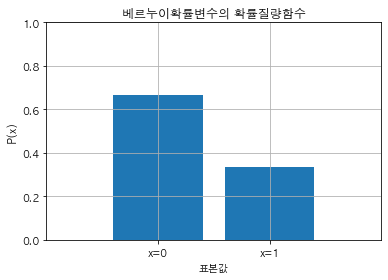

In [18]:
#베르누이 실험
p = 1/3
xx = [0, 1]
rv = sp.bernoulli(p)
print(f"평균 : {round(rv.mean(), 4)}")
print(f"분산 : {round(rv.var(), 4)}")

plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

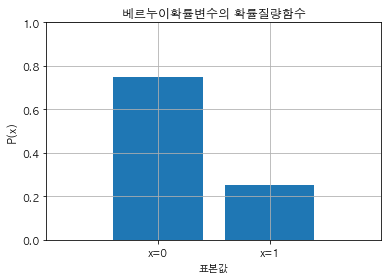

0.25
0.1875


In [20]:
p = 1/4
rv = sp.bernoulli(p)

plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

print(f"{round(rv.mean(), 4)}")
print(f"{round(rv.var(), 4)}")

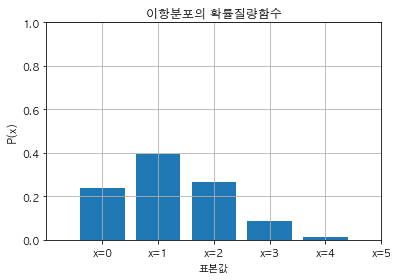

1.25
0.9375
0.6328
0.2637
0.8965
0.0156


In [30]:
# 이항분포
n, p = 10, 1/2
rv = sp.binom(n, p)
rv.pmf(3)

n, p = 4, 1/6
rv = sp.binom(n, p)
rv.pmf(0)

n, p = 6, 0.4
rv = sp.binom(n, p)
rv.pmf(3)

n, p = 5, 1/4
rv = sp.binom(n, p)
xx = [0, 1, 2, 3, 4, 5]

plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1, 2, 3, 4, 5], ['x=0','x=1','x=2','x=3','x=4','x=5'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('이항분포의 확률질량함수')
plt.grid()
plt.show()

print(f"{round(rv.mean(), 4)}")
print(f"{round(rv.var(), 4)}")

print(f"{round(rv.cdf(1), 4)}")
print(f"{round(rv.pmf(2), 4)}")
print(f"{round(rv.cdf(2), 4)}")
print(f"{round(1-rv.cdf(3), 4)}")


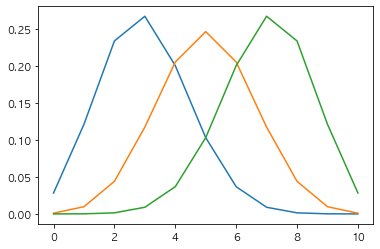

In [31]:
#이항분포 그래프 그리기
p1, p2, p3 = 0.3, 0.5, 0.7
n = 10
xx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rv1 = sp.binom(n, p1)
rv2 = sp.binom(n, p2)
rv3 = sp.binom(n, p3)
plt.plot(xx, rv1.pmf(xx))
plt.plot(xx, rv2.pmf(xx))
plt.plot(xx, rv3.pmf(xx))
plt.show()

In [32]:
n, p = 8, 0.25
rv = sp.binom(n, p)

print(f"{round(rv.cdf(4), 4)}")
print(f"{round(rv.pmf(4), 4)}")
print(f"{round(1-rv.cdf(3), 4)}")

0.9727
0.0865
0.1138


In [36]:
#기하분포
n, p = 5, 1/2

rv = sp.geom(p)
rv.pmf(5)

p=1/6
rv = sp.geom(p)
rv.pmf(3)

0.11574074074074076

In [ ]:
#포하송분포
